In [352]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns

# To be able to save images on server
import matplotlib
%matplotlib inline
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tensorflow
np.random.seed(42)
import tensorflow as tf


from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM , BatchNormalization, Conv1D, Conv2D,Flatten,Reshape
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2,L2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras import optimizers, losses, activations, models
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate, SpatialDropout1D, TimeDistributed, Bidirectional, LSTM
from keras_contrib.layers import CRF
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model

In [2]:
reformed_xdata=np.load(r'C:\Users\ASUS\Documents\school\IM680\SleepySignals_X.npy')

In [3]:
reformed_ydata=np.load(r'C:\Users\ASUS\Documents\school\IM680\SleepySignals_y.npy')

In [4]:
patient_list=[1351,2510,2939,4301,5852,5995,7257,7838,7844,8898]

In [5]:
patient_record= [982, 923, 886, 919, 861, 1057, 941, 902, 888, 869]

In [6]:
patient_loc=[]
for i, x in enumerate(patient_record):
    
    patient_loc.append(sum(patient_record[0:i]))

In [7]:
patient_loc.append(len(reformed_xdata))

In [8]:
lb = preprocessing.LabelBinarizer()

In [9]:
lb.fit(reformed_ydata)

LabelBinarizer()

In [10]:
reformed_ydata_binary=lb.transform(reformed_ydata)

In [11]:
xdata=np.asarray(reformed_xdata)

In [12]:
def hypnogram(pid):
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(range(len(reformed_ydata[patient_loc[pid]:patient_loc[pid+1]])),reformed_ydata[patient_loc[pid]:patient_loc[pid+1]],label='True Label')
    y_label_list = ['W', 'N1', 'N2' , 'N3/N4', 'REM']
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(y_label_list)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Sleep Stages')
    ax.set_title('Hypnogram for Patient: '+str(patient_list[pid]))
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'W', 'N1', 'N2' , 'N3/N4', 'REM'
    sizes = [list(reformed_ydata[patient_loc[pid]:patient_loc[pid+1]]).count(x) for x in range(0,5)]
    explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots(figsize=(6,6))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Sleep distribution for Patient: '+str( patient_list[pid]) )

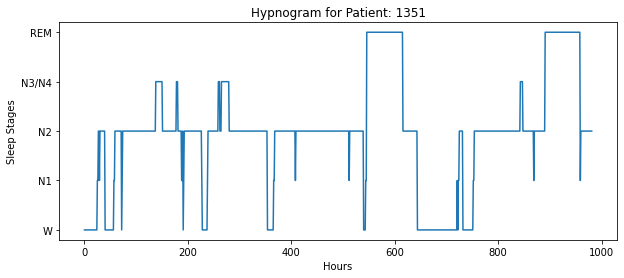

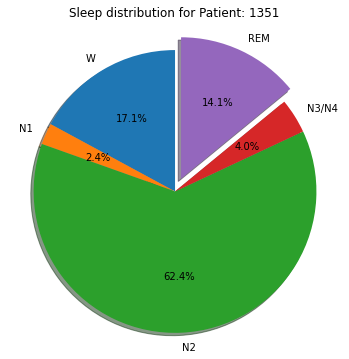

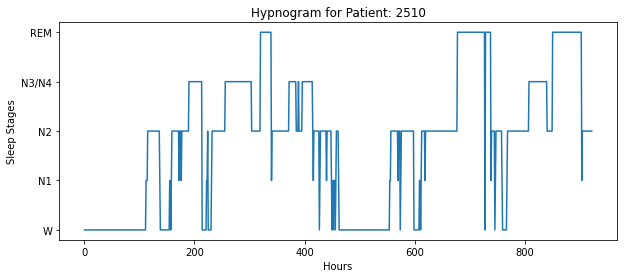

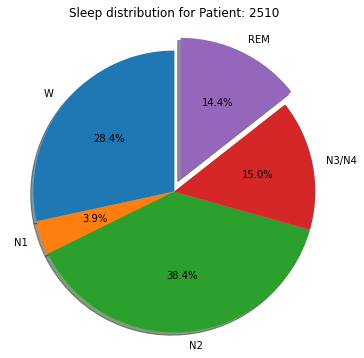

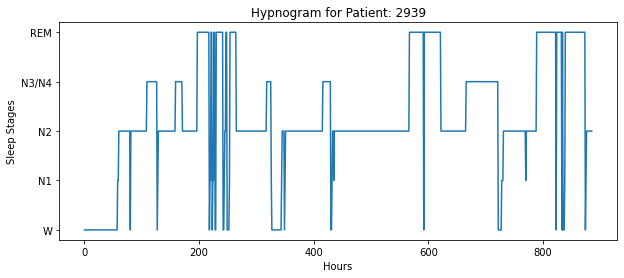

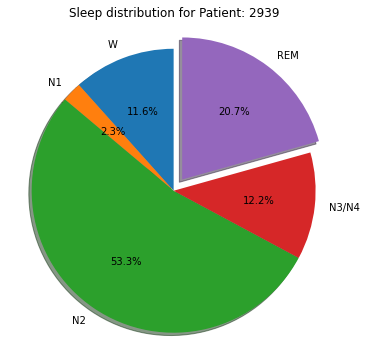

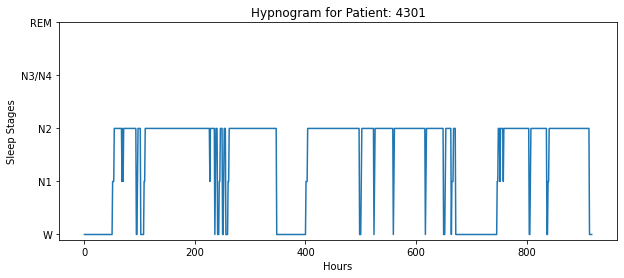

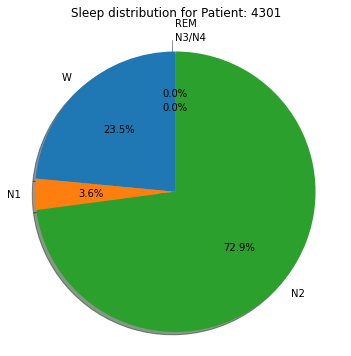

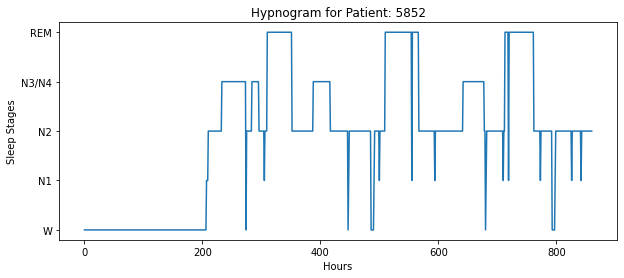

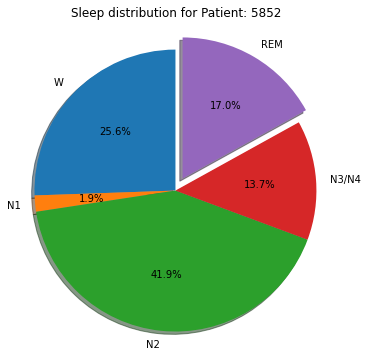

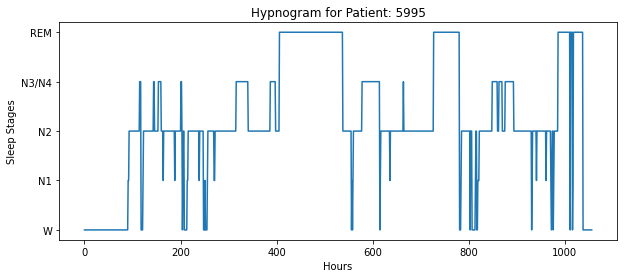

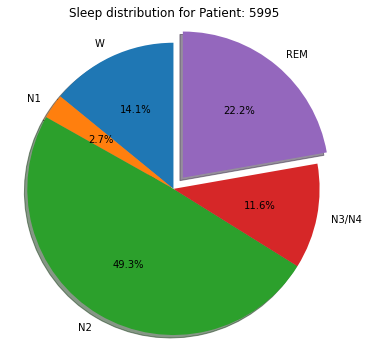

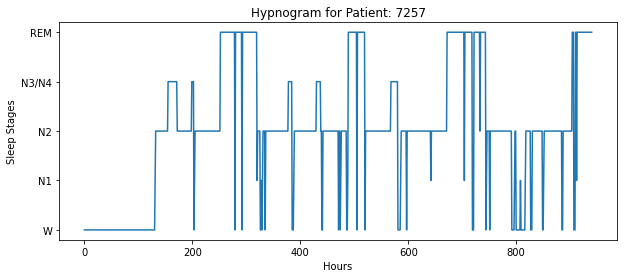

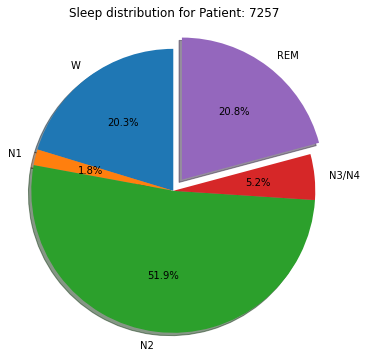

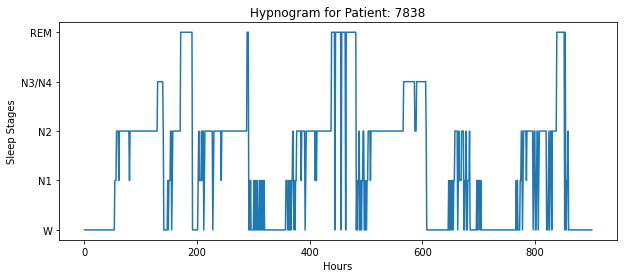

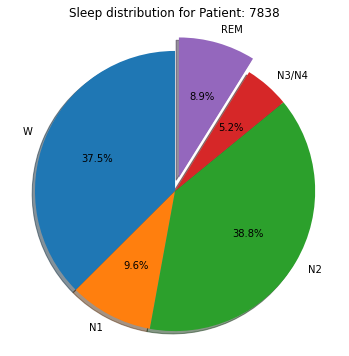

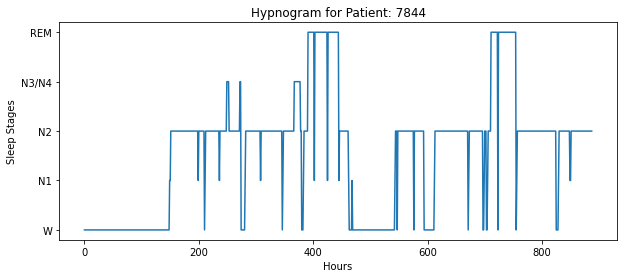

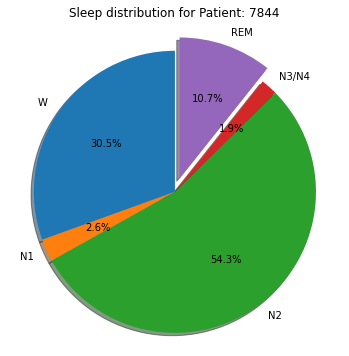

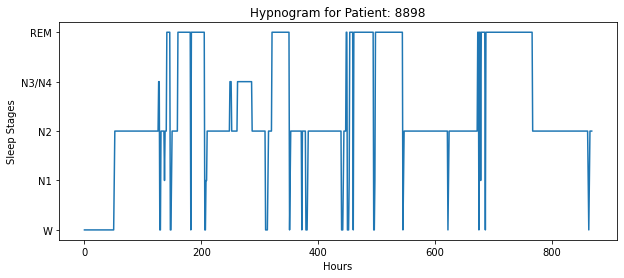

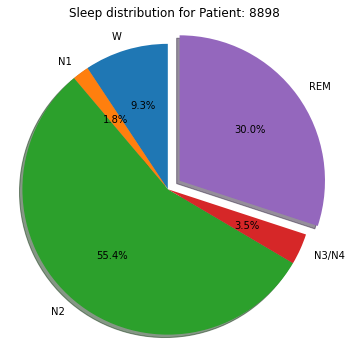

In [13]:
for i in range(10):
    hypnogram(i)

In [14]:
pid=1

In [15]:
x_test = xdata[patient_loc[pid]:patient_loc[pid+1] ];
y_test = reformed_ydata_binary[patient_loc[pid]:patient_loc[pid+1]]
x_train = np.concatenate((xdata[0:patient_loc[pid]],xdata[patient_loc[pid+1]:]))
y_train = np.concatenate((reformed_ydata_binary[0:patient_loc[pid]],reformed_ydata_binary[patient_loc[pid+1]:]))

In [16]:
y_train_true = np.concatenate((reformed_ydata[0:patient_loc[pid]],reformed_ydata[patient_loc[pid+1]:]))

In [17]:
y_test_true = reformed_ydata[patient_loc[pid]:patient_loc[pid+1]]

Text(0.5, 1.0, 'Sleep distribution for training data.')

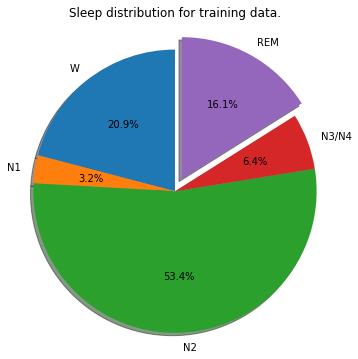

In [18]:
labels = 'W', 'N1', 'N2' , 'N3/N4', 'REM'
sizes = [list(y_train_true).count(x) for x in range(0,5)]
explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Sleep distribution for training data.' )

In [19]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(list(y_train_true)),
                                                 list(y_train_true))

In [20]:
class_weights = dict(enumerate(class_weights))

Class weight do not seem enough, we may need to create oversample training set.

In [276]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

0.8.0


In [305]:
x_smote = x_train.reshape(x_train.shape[0],-1)

In [303]:
y_train_true.shape

(8305,)

In [ ]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()

Class=1, n=70 (32.710%)
Class=2, n=76 (35.514%)
Class=3, n=17 (7.944%)
Class=5, n=13 (6.075%)
Class=6, n=9 (4.206%)
Class=7, n=29 (13.551%)


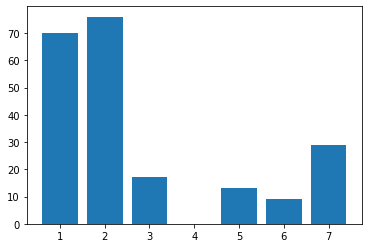

In [306]:
X_o, y_o = oversample.fit_resample(x_smote, y_train_true)
# summarize distribution

In [315]:
x_train=X_o.reshape(X_o.shape[0],x_train.shape[1],x_train.shape[2])

In [318]:
y_train = lb.transform(y_o)

In [21]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
nclass = len(y_train[0])

In [22]:
reg = L1L2(0.01, 0.01)

In [ ]:
# Model execution
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape((x_train.shape[0],  timesteps, input_dim))
x_test = x_test.reshape((x_test.shape[0], timesteps, input_dim))

In [ ]:
n_batch=32;n_epochs=30;
start = datetime.now()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,class_weight=class_weights,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs,callbacks=[callback],shuffle=True)

print("\n Time Taken: ",datetime.now() - start)

In [23]:
WINDOW_SIZE = 100
Fs = 100

In [27]:
from keras.models import Model
#from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
#from keras.optimizers import Adagrad

In [353]:
def makeConvLayers(inputLayer):
    #inputLayer = Input(shape=(timesteps, input_dim), name='inLayer')
    
    convFine = Conv1D(filters=64, kernel_size=int(Fs/2), strides=int(Fs/16), padding='same', 
                      activation='relu', name='fConv1',kernel_regularizer=L2(0.001))(inputLayer)
    convFine = MaxPool1D(pool_size=8, strides=8, name='fMaxP1')(convFine)
    convFine = Dropout(rate=0.5, name='fDrop1')(convFine)
    convFine = Conv1D(filters=128, kernel_size=8, padding='same', activation='relu', name='fConv2')(convFine)
    convFine = Conv1D(filters=128, kernel_size=8, padding='same', activation='relu', name='fConv3')(convFine)
    convFine = Conv1D(filters=128, kernel_size=8, padding='same', activation='relu', name='fConv4')(convFine)
    convFine = MaxPool1D(pool_size=4, strides=4, name='fMaxP2')(convFine)
    fineShape = convFine.get_shape()
    convFine = Flatten(name='fFlat1')(convFine)
    #print(convFine.get_shape()[1])
    
    # network to learn coarse features
    convCoarse = Conv1D(filters=32, kernel_size=Fs*4, strides=int(Fs/2), padding='same', 
                        activation='relu', name='cConv1',kernel_regularizer=L2(0.001) )(inputLayer)
    convCoarse = MaxPool1D(pool_size=4, strides=4, name='cMaxP1')(convCoarse)
    convCoarse = Dropout(rate=0.5, name='cDrop1')(convCoarse)
    convCoarse = Conv1D(filters=256, kernel_size=6, padding='same', activation='relu', name='cConv2')(convCoarse)
    convCoarse = Conv1D(filters=256, kernel_size=6, padding='same', activation='relu', name='cConv3')(convCoarse)
    convCoarse = Conv1D(filters=256, kernel_size=6, padding='same', activation='relu', name='cConv4')(convCoarse)
    convCoarse = MaxPool1D(pool_size=2, strides=2, name='cMaxP2')(convCoarse)
    coarseShape = convCoarse.get_shape()
    convCoarse = Flatten(name='cFlat1')(convCoarse)
    #print(convCoarse.get_shape()[1])
    #convFine = Reshape((-1,convFine.get_shape()[1]), name='reshape1')(convFine)
    #print(convFine.get_shape())
    #convCoarse = Reshape((convFine.get_shape()[1],-1), name='reshape2')(convCoarse)
    #print(convCoarse.get_shape())
    # concatenate coarse and fine cnns
    mergeLayer = concatenate([convFine, convCoarse], axis=-1,name='merge_1')
    return mergeLayer, (coarseShape, fineShape)

In [354]:
def preTrainingNet(n_feats, input_dim, n_classes):
    inLayer = Input(shape=(n_feats, input_dim), name='inLayer')
    mLayer, (_, _) = makeConvLayers(inLayer)
    outLayer = Dense(n_classes, activation='softmax', name='outLayer')(mLayer)
    #outLayer = Dense(n_feats, activation='sigmoid', name='outLayer')(mLayer)
    
    network = Model(inLayer, outLayer)
    pre_opt = optimizers.Adam(lr=1e-4)
    network.compile(loss='categorical_crossentropy',optimizer=pre_opt, metrics=['accuracy'])
    #network.compile(loss='mean_squared_error', optimizer='adadelta')
    
    return network

In [355]:
def fineTuningNet(n_feats, input_dim , n_classes, preTrainedNet):
    inLayer = Input(shape=(n_feats, input_dim), name='inLayer')
    mLayer, (cShape, fShape) = makeConvLayers(inLayer)
    outLayer = Dropout(rate=0.5, name='mDrop1')(mLayer)
    
    # this is the network that learns temporal dependencies using LSTM
    # merge the outputs of last layers
    # reshape because LSTM layer needs 3 dims (None, 1, n_feats)
    outLayer = Reshape((1, int(fShape[1]*fShape[2] + cShape[1]*cShape[2])))(outLayer)
    outLayer = Bidirectional(LSTM(512, activation='relu', dropout=0.5, name='bLstm1'))(outLayer)
    outLayer = Reshape((1, int(outLayer.get_shape()[1])))(outLayer)
    outLayer = Bidirectional(LSTM(512, activation='relu', dropout=0.5, name='bLstm2'))(outLayer)
    outLayer = Dense(n_classes, activation='softmax', name='outLayer')(outLayer)
    
    network = Model(inLayer, outLayer)
    
    # now that we have the network, we will copy the weights from the pretrained network into this network
    allPreTrainLayers = dict([(layer.name, layer) for layer in preTrainedNet.layers])
    allFineTuneLayers = dict([(layer.name, layer) for layer in network.layers])
    
    allPreTrainLayerNames = [layer.name for layer in preTrainedNet.layers]
    # we don't need the input and output layers from the pretrained net, so discard them
    allPreTrainLayerNames = [l for l in allPreTrainLayerNames if l not in ['inLayer', 'outLayer']]
    
    # now set weights of fine tune network based on pre train network
    for l in allPreTrainLayerNames:
        allFineTuneLayers[l].set_weights(allPreTrainLayers[l].get_weights())
    seq_opt = optimizers.Adam(lr=1e-6)
    network.compile(loss='categorical_crossentropy', optimizer=seq_opt, metrics=['accuracy'])
    
    return network

In [356]:
model_pretrain=preTrainingNet(timesteps , input_dim,nclass)

In [357]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
start = datetime.now()
n_epochs=100;n_batch=75;
# Training the model
trained_model= model_pretrain.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                          validation_data=(x_test, y_test),
                          epochs=n_epochs,shuffle=True)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/100
296/296 [==============================] - 133s 435ms/step - loss: 1.4026 - accuracy: 0.4174 - val_loss: 2.2371 - val_accuracy: 0.1614
Epoch 2/100
296/296 [==============================] - 137s 462ms/step - loss: 1.2234 - accuracy: 0.5064 - val_loss: 2.4437 - val_accuracy: 0.2004
Epoch 3/100
296/296 [==============================] - 127s 427ms/step - loss: 1.1117 - accuracy: 0.5598 - val_loss: 2.3124 - val_accuracy: 0.2199
Epoch 4/100
296/296 [==============================] - 103s 347ms/step - loss: 1.0214 - accuracy: 0.6047 - val_loss: 2.1926 - val_accuracy: 0.2459
Epoch 5/100
296/296 [==============================] - 103s 347ms/step - loss: 0.9543 - accuracy: 0.6347 - val_loss: 2.4343 - val_accuracy: 0.3099
Epoch 6/100
296/296 [==============================] - 104s 350ms/step - loss: 0.9042 - accuracy: 0.6567 - val_loss: 2.8742 - val_accuracy: 0.2719
Epoch 7/100
296/296 [==============================] - 103s 347ms/step - loss: 0.8492 - accuracy: 0.6828 - val_loss: 2

KeyboardInterrupt: 

In [322]:
# save neural network weights so that we can use them while testing    
model_pretrain.save_weights('supervisePreTrainNet_TestSub.h5')

In [345]:
model_pretrain.load_weights('supervisePreTrainNet_TestSub.h5')

In [349]:
model_fineTune=fineTuningNet(timesteps , input_dim,nclass,model_pretrain)

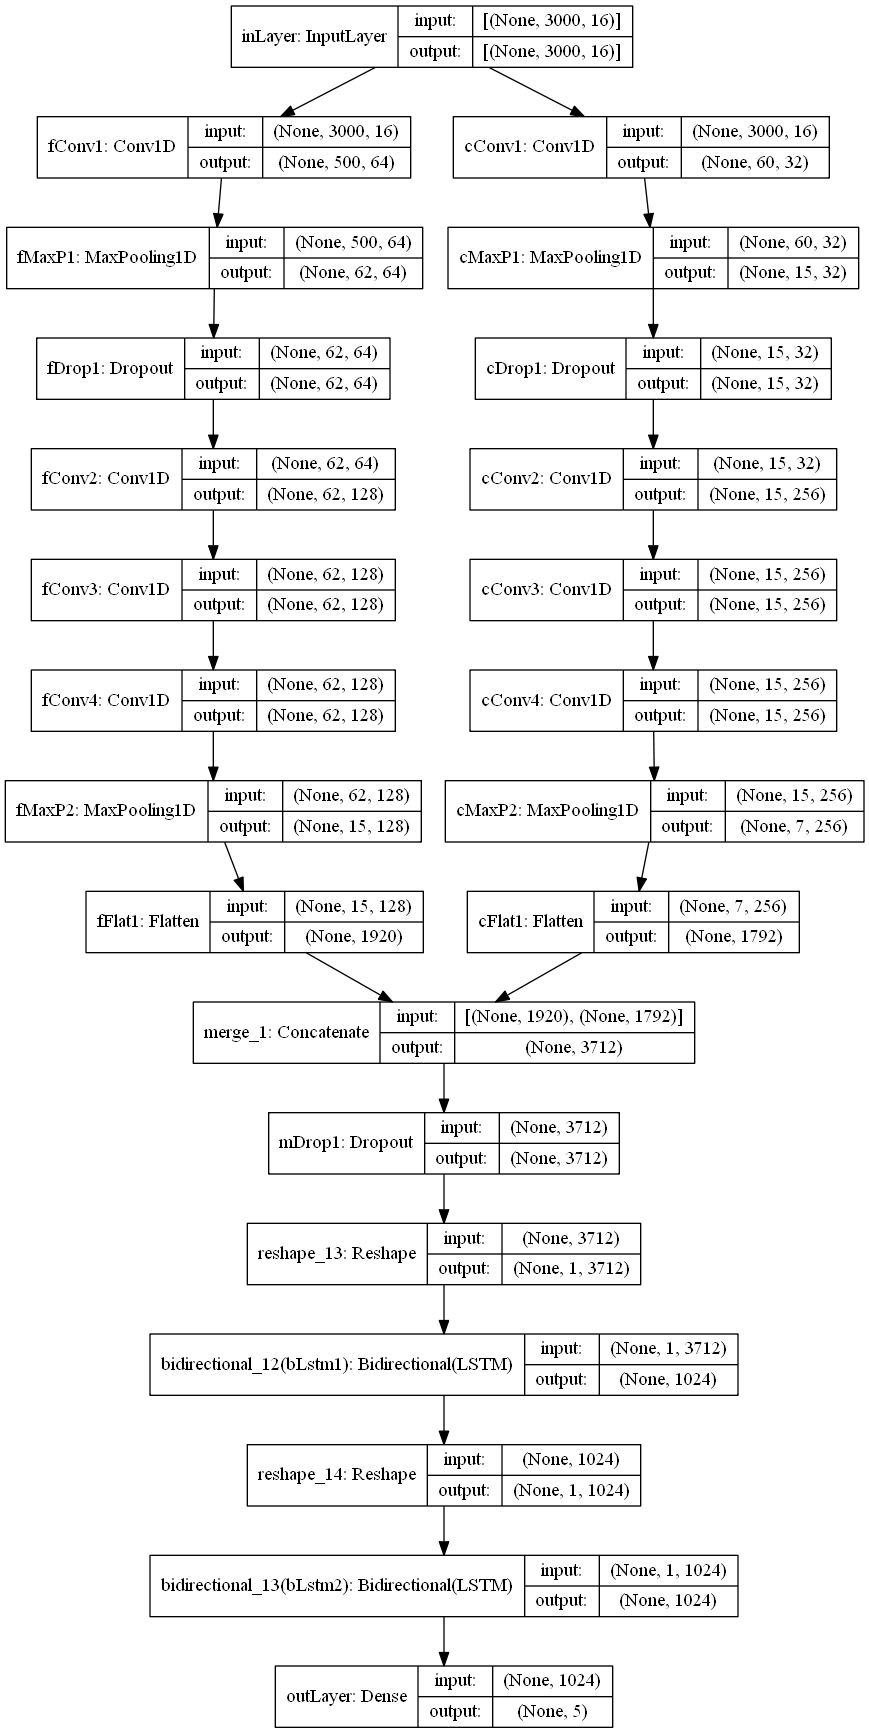

In [350]:
plot_model(model_fineTune, show_shapes=True)

In [351]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
start = datetime.now()
n_epochs=100;n_batch=75;
# Training the model
finetune_model= model_fineTune.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                          validation_data=(x_test, y_test),
                          epochs=n_epochs,callbacks=[callback],shuffle=True)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/100
296/296 [==============================] - 267s 851ms/step - loss: 340.1291 - accuracy: 0.6090 - val_loss: 299.9841 - val_accuracy: 0.2004
Epoch 2/100
296/296 [==============================] - 222s 751ms/step - loss: 265.0462 - accuracy: 0.7072 - val_loss: 234.1804 - val_accuracy: 0.2340
Epoch 3/100
296/296 [==============================] - 209s 707ms/step - loss: 206.4258 - accuracy: 0.6947 - val_loss: 182.2470 - val_accuracy: 0.2438
Epoch 4/100
296/296 [==============================] - 198s 668ms/step - loss: 160.1331 - accuracy: 0.6772 - val_loss: 141.4316 - val_accuracy: 0.3261
Epoch 5/100
296/296 [==============================] - 217s 733ms/step - loss: 123.9512 - accuracy: 0.6652 - val_loss: 109.8238 - val_accuracy: 0.1463
Epoch 6/100
296/296 [==============================] - 207s 699ms/step - loss: 96.3903 - accuracy: 0.6607 - val_loss: 86.1593 - val_accuracy: 0.1268
Epoch 7/100
296/296 [==============================] - 217s 733ms/step - loss: 75.8527 - accurac

KeyboardInterrupt: 

# Read about DeepSleepNet https://arxiv.org/pdf/1703.04046.pdf

    The representation learning part was pre-trained using the oversampled training set with the mini-batch size of 100. The Adam optimizer’s parameters lr, beta1, and beta2 were set to 10−4, 0.9 and 0.999 respectively. 
    Then the whole model was fine-tuned using the sequential training set. Specifically, we equally split the sequences of 30-s EEG epochs from each subject data into 10 sub-sequences (i.e., batch size was 10).
    Then we fed 25 epochs (i.e., sequence length was 25) from each sub-sequence yielding 250 epochs per one step training.
    The Adam optimizer’s parameters were similar to the pretraining step except that the learning rate of each part of the model, lr1 and lr2, were set to 10−6 and 10−4 respectively.
        The threshold of the gradient clipping was set to 10. The numbers of epochs for the pre-training and the fine-tuning steps were set to 100 and 200 respectively. There was no early stopping as there was no validation set in our evaluation scheme.
    For the batch normalization in conv and fc blocks, the constant of 10−5 was added to the mini-batch variance for numerical stability. The mean and variance of the training set, which were used as fixed parameters during testing, were estimated by computing the moving average of with a decay rate of 0.999 from the sampling mean and variance of each mini-batch.